### ARMA Models

#### How Time Series is used in variety of fields?
- Knowing the future of obesity rates could help us intervene now for public health.
- Predicting consumer energy demands could help power stations run more efficiently.
- Predicting how the population of a city will change could help us build the infrastructure we will need.

#### Trend
- A positive trend is a line that generally slopes up i.e., the values increase with time.
- A negative trend is where the values decrease.

#### Seasonality
- A seasonal time series has patterns that repeat at regular intervals.
    - Ex. High sales every weekend.

#### Cycliacality 
- Repeating pattern but no fixed period

#### White Noise
- Series of measurements, where each value is uncorrelated with previous values.
    - Ex. Flipping a coin, the outcome of coin flip doesn't rely on hte outcomes of coin flips that came before.

#### Stationarity
- The distribution of data doesn't change with time.
    - The series has zero trend, it isn't growing or shrinking.
    - The variance is constant, the average distance of the data points from the zero line isn't changing.
    - Autocorrelation is constant, how each value in time series is related to its neighbors stays the same.

### Exploration
#### Task
Here your task is to plot a dataset of monthly US candy production between 1972 and 2018.
#### Context
Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.
#### Objective
Check out how this quantity has changed over time and how it changes throughout the year.

In [18]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load in the candy production time series dataset
# Set the index to the date column
# Parse the dates 
candy = pd.read_csv('/Users/jessica/Downloads/candy_production.csv', index_col='date', parse_dates=True)

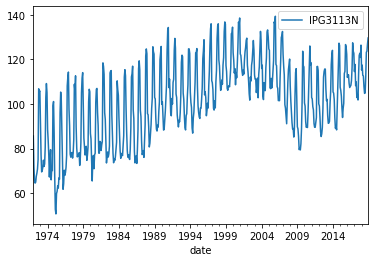

In [6]:
# Plot time series onto the axis using .plot()
# Show the plot
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

In [10]:
# Split the times series into train & test sets
# Slicing datetime indexes
# Take the train set as everything upto end of 2006
# Test set as everything from start of 2007
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

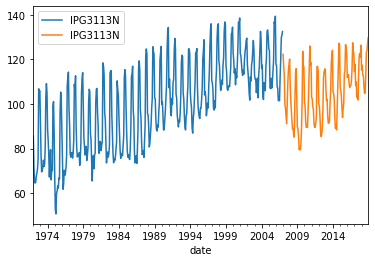

In [11]:
# Make a pyplot axes using subplot()
fig, ax = plt.subplots()
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

### Making Time Series Stationary
#### Augmented Dicky Fuller Test
- Tests for trend non-stationarity
- Null Hypothesis is time series is non-stationary
- Interpreting the test results :
    - 0th element is test statistic 
        - More negative means more likely to be stationary
    - 1st element is p-value 
        - If p-value is small, then reject null hypothesis, reject non-stationary
    - 4th element is the critical test statistics
- Value of plotting :
    - Plotting time series can stop you making wrong assumptions

#### Feature Engineering
- Taking the difference : <mark>df.diff().dropna()</mark>
- Other transforms
    - Take the log : <mark>np.log(df)</mark>
    - Take the square root : <mark>np.sqrt(df)</mark>
    - Take the proportional change : <mark>df.shift(1)/df</mark>

In [12]:
from statsmodels.tsa.stattools import adfuller

### Augmented Dicky-Fuller

In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

In [13]:
earthquake = pd.read_csv('/Users/jessica/Downloads/earthquakes.csv', index_col='date', parse_dates=True)

In [14]:
# Run adfuller test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.1831922511917816
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


### Other tranforms

Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:

- <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>l</mi>
  <mi>o</mi>
  <mi>g</mi>
  <mi mathvariant="normal">_</mi>
  <mi>r</mi>
  <mi>e</mi>
  <mi>t</mi>
  <mi>u</mi>
  <mi>r</mi>
  <mi>n</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>y</mi>
    <mi>t</mi>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>l</mi>
  <mi>o</mi>
  <mi>g</mi>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mfrac>
      <msub>
        <mi>y</mi>
        <mi>t</mi>
        <mi>/</mi>
      </msub>
      <msub>
        <mi>y</mi>
        <mrow>
          <mi>t</mi>
          <mo>&#x2212;</mo>
          <mn>1</mn>
        </mrow>
      </msub>
    </mfrac>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
</math>

The Amazon stock time series has already been loaded for you as amazon. You can calculate the log-return of this DataFrame by substituting:

- <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>y</mi>
    <mi>t</mi>
  </msub>
  <mo stretchy="false">&#x2192;</mo>
</math> <mark>amazon</mark> </br>

- <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>y</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo stretchy="false">&#x2192;</mo>
</math> <mark>amazon.shift(1)</mark> </br>

- <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>l</mi>
  <mi>o</mi>
  <mi>g</mi>
  <mo stretchy="false">(</mo>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">&#x2192;</mo>
</math> <mark>np.log</mark>

In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.



In [15]:
amazon = pd.read_csv('/Users/jessica/Downloads/amazon_close.csv', index_col='date', parse_dates=True)

In [16]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.2035794888112425, 2.331271725487213e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


In [19]:
# Calculate log-return and drop nans
amazon_log = np.log(amazon)
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-0.7739778922526593, 0.8266466281503938, 0, 1258, {'1%': -3.4355588184378574, '5%': -2.8638402312881497, '10%': -2.5679946684494275}, -6249.367882443734)


### Intro to AR, MA, & ARMA Models

- AR -> Autoregressive Model

- MA -> Moving Average Model

- ARMA = AR + MA

In [20]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [22]:
from statsmodels.tsa.arima_model import ARMA

### Fitting Time Series Models
- ARMAX Models
    - Exogenous ARMA
    - Use external variables as well as time series
    - ARMAX = ARMA + linear regression
        - Ex. Monitoring daily productivity : as your productivity on previous days may have an effect your productivity today.
            - Exogenous variable : amount of sleep you got the night before.
                - ```model = ARMA(df['productivity'],
     order=(2,1),
     exog=df['hours_sleep'])```

### Fitting an ARMA model

In this exercise you will fit an ARMA model to the earthquakes dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground.

In [24]:
# Instantiate the model
model = ARMA(earthquake['earthquakes_per_year'], order=(3, 1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19051D+00    |proj g|=  1.09002D-02

At iterate    5    f=  3.18963D+00    |proj g|=  7.45040D-03

At iterate   10    f=  3.18862D+00    |proj g|=  2.63567D-04

At iterate   15    f=  3.18861D+00    |proj g|=  1.17462D-04

At iterate   20    f=  3.18861D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     29      1     0     0   4.441D-08   3.189D+00
  F =   3.1886125108032068     

CONVERG

### Forecasting
- Predicting next value
    - Take an AR(1) model
    - Predict next value
    - Uncertainity on prediciton
- SARIMAX Class
    - ``` model = SARIMAX(df, order=(p,0,q), trend='c')```
- Making one-step ahead predicitons
    - Make predictions for last 25 values
        - ```results = model.fit()```
    - Make in-sample prediction
        - ```forecast = results.get_prediction(start=-25)```
    - Forecast Mean
        - ```mean_forecast = forecast.predicted_mean```
- Confidence Interval
    - To get lower and upper limits on the values of our predictions
        - ```confidence_intervals = forecast.conf_int()```
- Plotting Predicitons
    - ```plt.figure()```
    - Plot predicitons
        - ```plt.plot(dates, mean_forecast.values,color='red',label='forecast')```
    - Shade uncertainity areas
        - ```plt.fill_between(dates,lower_limits,upper_limits,color='pink')```
- Making Dynamic Predictions
    - ```results=model.fit()```
    - ```forecast = results.get_prediction(start=-25, dynamic=True)```
    - Forecast mean 
    - Confidence intervals of forecasts
- Forecasting out of sample
    - ```forecast = results.get_forecast(steps=20)```
    - Forecast mean
    - Confidence intervals of forecasts
    - ```forecast = results.get_forecast(steps=20)```

In [26]:
# SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Generating one-step-ahead predictions

It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

In [27]:
model = SARIMAX(amazon.loc['2018-01-01':'2019-02-08'], order=(3, 1, 3), seasonal_order=(1, 0, 1, 7),
                enforce_invertibility=False,
                enforce_stationarity=False,
                simple_differencing=False, 
                measurement_error=False,
                k_trend=0)
results = model.fit()

/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30253D+00    |proj g|=  6.06874D-01

At iterate    5    f=  4.81229D+00    |proj g|=  1.38146D-01

At iterate   10    f=  4.79978D+00    |proj g|=  1.94185D-01

At iterate   15    f=  4.79104D+00    |proj g|=  4.64522D-02

At iterate   20    f=  4.79083D+00    |proj g|=  8.45036D-03

At iterate   25    f=  4.78972D+00    |proj g|=  3.79825D-02

At iterate   30    f=  4.78952D+00    |proj g|=  2.68053D-03

At iterate   35    f=  4.78938D+00    |proj g|=  2.20958D-02

At iterate   40    f=  4.78885D+00    |proj g|=  2.39102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               close   No. Observations:                  278
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -1331.301
Date:                             Fri, 22 Jul 2022   AIC                           2680.602
Time:                                     13:57:45   BIC                           2712.853
Sample:                                          0   HQIC                          2693.558
                                             - 278                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0938      0.031      3.075      0.002       0.034       0.154
ar.L2          0.0350      0.028      1.234      0.217      -0.021       0.091
ar.L3         -0.9275      0.030    -30.987      0.000      -0.986      -0.869
ma.L1         -0.1050    111.252     -0.001      0.999    -218.155     217.945
ma.L2         -0.1050     96.549     -0.001      0.999    -189.337     189.127
ma.L3          1.0000    190.230      0.005      0.996    -371.844     373.844
ar.S.L7       -0.2796      0.232     -1.205      0.228      -0.734       0.175
ma.S.L7        0.2593      0.239      1.086      0.278      -0.209       0.727
sigma2      1240.2765   2.36e+05      0.005      0.996   -4.61e+05    4.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                35.54
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2018-02-13    1442.602324
2018-02-12    1415.107559
2018-02-09    1386.500367
2018-02-08    1348.930150
2018-02-07    1352.991040
2018-02-06    1413.111610
2018-02-05    1429.830118
2018-02-02    1389.669715
2018-02-01    1437.201790
2018-01-31    1399.213288
2018-01-30    1457.638594
2018-01-29    1424.836963
2018-01-26    1413.303107
2018-01-25    1395.169468
2018-01-24    1387.292934
2018-01-23    1363.334121
2018-01-22    1370.226685
2018-01-19    1317.827883
2018-01-18    1293.164311
2018-01-17    1283.690608
2018-01-16    1301.767920
2018-01-12    1307.033713
2018-01-11    1315.126815
2018-01-10    1273.460324
2018-01-09    1256.212759
2018-01-08    1242.034766
2018-01-05    1248.810716
2018-01-04    1227.162424
2018-01-03    1220.893513
2018-01-02    1204.120433
Name: predicted_mean, dtype: float64


### Plotting one-step-ahead predictions

Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer.

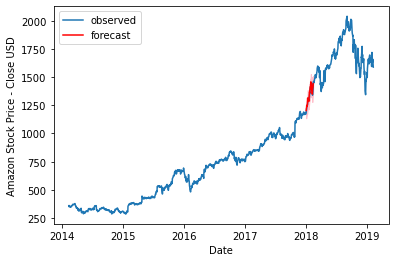

In [30]:
# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Generating dynamic forecasts

Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

In [31]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast.values)

[1442.60232441 1442.89498429 1440.88554969 1449.17929575 1450.29401913
 1452.20248109 1445.25780768 1444.17018651 1441.75560551 1448.25142959
 1449.60694171 1452.01115111 1446.35733096 1444.50579876 1441.75596834
 1446.7606955  1448.76190982 1451.72495989 1447.48427941 1445.30669005
 1442.24728281 1445.85868277 1448.08666232 1451.28452121 1448.29909911
 1446.04970428 1442.77595871 1445.1474336  1447.32999693 1450.66057365]


### Plotting dynamic forecasts

Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

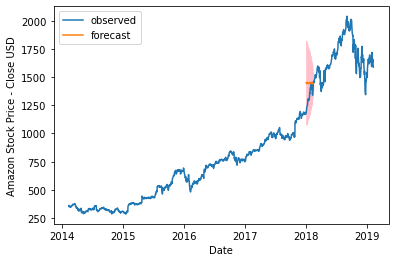

In [32]:
# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# Plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, label='forecast')

# Shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends
plt.xlabel('Date');
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend();

### Intro ARIMA Models
- Forecasting + Non-stationarity 
- ARIMA Model
    - Take the difference
    - Fit ARMA model
    - Integrate Forcast
    
OR 

- Use ARIMA : Autoregressive Integrated Moving Average
    - Using ARIMA model
        - ```model = SARIMAX(df, order=(p,d,q))```
            - p : num of autoregressive lags
            - d : order of differencing
            - q : num of moving average lags
        - ```model.fit()```
        - ```mean_forecast = results.get_forecast(steps=10).predicted_mean```  

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Differencing and fitting ARMA
In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

In [35]:
amazon_diff = amazon.diff().dropna()

# Create ARMA(2, 2) model
arma = SARIMAX(amazon_diff, order=(2, 0, 2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.40305D+00    |proj g|=  1.36214D-02

At iterate    5    f=  4.40285D+00    |proj g|=  5.51841D-03

At iterate   10    f=  4.40156D+00    |proj g|=  2.55039D-03

At iterate   15    f=  4.40021D+00    |proj g|=  4.37503D-03

At iterate   20    f=  4.39969D+00    |proj g|=  5.01504D-04

At iterate   25    f=  4.39957D+00    |proj g|=  1.65768D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     33      1     0     0   

### Unrolling ARMA forecast
Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

In [36]:
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1, 0]

# Print forecast
print(arma_value_forecast)

1258    359.999387
1259    360.587838
1260    359.811247
1261    360.403300
1262    359.698675
1263    360.280754
1264    359.633468
1265    360.197681
1266    359.597839
1267    360.139847
Name: predicted_mean, dtype: float64


/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [37]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2, 1, 2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39955D+00    |proj g|=  1.35740D-02

At iterate    5    f=  4.39935D+00    |proj g|=  5.51653D-03

At iterate   10    f=  4.39806D+00    |proj g|=  2.54639D-03

At iterate   15    f=  4.39668D+00    |proj g|=  4.16480D-03

At iterate   20    f=  4.39619D+00    |proj g|=  3.81685D-04

At iterate   25    f=  4.39608D+00    |proj g|=  2.27694D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     33      1     0     0   

/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
